# Linear Programming

In [6]:
versioninfo()

UndefVarError: UndefVarError: versioninfo not defined

In [7]:
using Pkg
Pkg.activate("../..")
Pkg.status()

  Activating new environment at `~/Desktop/Project.toml`


      Status `~/Desktop/Project.toml` (empty project)


## Linear programming (LP)

* When the objective and constraint functions are all affine, the problem is called a *linear program* (LP) .
* A general linear program takes the form
$$
\begin{aligned}
	\text{minimize} &\quad \mathbf{c}^T \mathbf{x} \\
	\text{subject to} &\quad \mathbf{A} \mathbf{x} = \mathbf{b} \\
	&\quad \mathbf{G} \mathbf{x} \leq \mathbf{h}
\end{aligned}
$$
* Linear program is a convex optimization problem, why?
	- Objective function is linear, so that it is a convex function.
	- Constraint set is an intersection of hyperplane and polyhedron which are both convex. Hence The constraint set is a convex set.


<img src="./images/lp.png" width="500" align="center"/>

* Note that maximization problem with affine objective and constraint functions is also LP problem
$$
\begin{aligned}
	\text{maximize} &\quad \mathbf{c}^T \mathbf{x} \\
	\text{subject to} &\quad \mathbf{A} \mathbf{x} = \mathbf{b} \\
	&\quad \mathbf{G} \mathbf{x} \leq \mathbf{h}
\end{aligned}
$$
This is because maximizing $\mathbf{c}^T \mathbf{x}$ is equivalent to minimizing $(-\mathbf{c})^T \mathbf{x}$
* The **standard form** of an LP is
$$
\begin{aligned}
	\text{minimize} &\quad \mathbf{c}^T \mathbf{z} \\
	\text{subject to} &\quad \mathbf{A} \mathbf{z} = \mathbf{b} \\
	&\quad \mathbf{z} \geq \mathbf{0}
\end{aligned}
$$
To transform a general linear program into the standard form, we introduce the _slack variables_ $\mathbf{s} \geq \mathbf{0}$ such that $\mathbf{G} \mathbf{x} + \mathbf{s} = \mathbf{h}$. Then we write $\mathbf{x} = \mathbf{x}^+ - \mathbf{x}^-$, where $\mathbf{x}^+ \succeq \mathbf{0}$ and $\mathbf{x}^- \geq \mathbf{0}$. This yields the problem
$$
\begin{aligned}
	\text{minimize} &\quad \mathbf{c}^T (\mathbf{x}^+ - \mathbf{x}^-) \\
	\text{subject to} &\quad \mathbf{A} (\mathbf{x}^+ - \mathbf{x}^-) = \mathbf{b} \\
	&\quad \mathbf{G} (\mathbf{x}^+ - \mathbf{x}^-) + \mathbf{s} = \mathbf{h} \\
	&\quad \mathbf{x}^+ \geq \mathbf{0}, \mathbf{x}^- \geq \mathbf{0}, \mathbf{s} \geq \mathbf{0}
\end{aligned}
$$
in $\mathbf{x}^+$, $\mathbf{x}^-$, and $\mathbf{s}$. Letting $\mathbf{z} = (\mathbf{x}^{+}, \mathbf{x}^{-}, \mathbf{s})$ makes the formulation standard :
$$
\begin{aligned}
	\text{minimize} &\quad \begin{bmatrix} \mathbf{c} & -\mathbf{c} & \mathbf{0} \end{bmatrix}^T \mathbf{z} \\
	\text{subject to} &\quad \begin{bmatrix}\mathbf{A} & -\mathbf{A} & \mathbf{0} \end{bmatrix} \mathbf{z} = \mathbf{b} \\
	&\quad \begin{bmatrix}\mathbf{G} & -\mathbf{G} & \mathbf{I} \end{bmatrix} \mathbf{z} = \mathbf{h} \\
	&\quad \mathbf{z} \geq \mathbf{0}
\end{aligned}
$$

Slack variables are often used to transform a complicated inequality constraint to simple non-negativity constraints.

* The **inequality form** of an LP is
\begin{align*}
	\text{minimize} &\quad \mathbf{c}^T \mathbf{x} \\
	\text{subject to} &\quad \mathbf{G} \mathbf{x} \leq \mathbf{h}.
\end{align*}
To transform a general linear program into the standard form, use a simple trick that $\mathbf{A}\mathbf{x}=\mathbf{b} \Leftrightarrow \mathbf{A}\mathbf{x}\leq \mathbf{b} \,\;\&\;\, \mathbf{A}\mathbf{x} \geq\mathbf{b}$  
Hence constraint $\mathbf{A} \mathbf{z} = \mathbf{b} \,\;\&\;\, \mathbf{G} \mathbf{x} \leq \mathbf{h}$ can be transformed into 
$$
\begin{align*}
	\begin{bmatrix}
		\mathbf{A} \\ -\mathbf{A} \\ \mathbf{G}
	\end{bmatrix} \mathbf{x}\leq
	\begin{bmatrix}
		\mathbf{b} \\ -\mathbf{b} \\ \mathbf{h}
	\end{bmatrix}
\end{align*}
$$

* Some softwares, e.g., `solveLP` in R, require an LP be written in either standard or inequality form. However a good software should do this for you!

## Problems that can be formulated as LP

* A _convex_piecewise-linear minimization_ problem
\begin{align*}
	\text{minimize}\quad \max_{i=1,\ldots,m} (\mathbf{a}_i^T \mathbf{x} + b_i)
\end{align*}
can be expressed as the epigraph problem ( Recall that pointwise maximum preserves convexity )
\begin{align*}
	\text{minimize} &\quad t \\
	\text{subject to} &\quad \max_{i=1,\ldots,m} (\mathbf{a}_i^T \mathbf{x} + b_i)\leq t
\end{align*}
and then subsequently can be transformed to an LP
\begin{align*}
	\text{minimize} &\quad t \\
	\text{subject to} &\quad \mathbf{a}_i^T \mathbf{x} + b_i \le t, \quad i = 1,\ldots,m,
\end{align*}
in $\mathbf{x}$ and $t$.  
$\because \quad t = \begin{bmatrix} \mathbf{0} & -1\end{bmatrix}^T \begin{bmatrix} \mathbf{x} \\ t \end{bmatrix}$ and $\;\mathbf{a}_i^T \mathbf{x} + b_i \le t \Leftrightarrow \begin{bmatrix} \mathbf{a}_i & -1\end{bmatrix}^T \begin{bmatrix} \mathbf{x} \\ t \end{bmatrix}\leq -b_i$
  
Apparently  
$$
	\text{minimize} \max_{i=1,\ldots,m} |\mathbf{a}_i^T \mathbf{x} + b_i|
$$
and
$$
	\text{minimize} \max_{i=1,\ldots,m} (\mathbf{a}_i^T \mathbf{x} + b_i)_+
$$
are also LP. This is because each problem can be transformed into 
\begin{align*}
	\text{minimize} &\quad t \\
	\text{subject to} &\quad -t\le \mathbf{a}_i^T \mathbf{x} + b_i \le t, \quad i = 1,\ldots,m, \\
	&\quad t\geq 0
\end{align*}
and
\begin{align*}
	\text{minimize} &\quad t \\
	\text{subject to} &\quad 0 \le \mathbf{a}_i^T \mathbf{x} + b_i \le t, \quad i = 1,\ldots,m, \\
	&\quad t\geq 0
\end{align*}
respectively. Recall that if $g$ is convex and $h$ is affine map then $g\circ h$ is convex . Here, $x\mapsto |x|$ or $x\mapsto (x)_+$ takes the position of $g$
* Note that for any convex function $f$, $$\text{minimize}\quad  f(x)$$ is equivalent to
$$
\begin{align*}
	\text{minimize} &\quad t	\\
	\text{subject to} &\quad f(x)\leq t
\end{align*}
$$
Why does it hold true? Observe that constraint set is just a $\text{epi} f$ now. Minimizing $t$ on $\text{epi}f$ is equivalent to minimizing $f$

* Any _convex optimization problem_
\begin{align*}
	\text{minimize}&\quad f_0(\mathbf{x}) \\
	\text{subject to}&\quad f_i(\mathbf{x}) \le 0, \quad i=1,\ldots,m \\
	&\quad \mathbf{a}_i^T \mathbf{x} = b_i, \quad i=1,\ldots,p,
\end{align*}
where $f_0,\ldots,f_m$ are convex functions, can be transformed to the _epigraph form_
\begin{align*}
	\text{minimize}&\quad t \\
	\text{subject to}&\quad f_0(\mathbf{x}) - t \le 0 \\
	&\quad f_i(\mathbf{x}) \le 0, \quad i=1,\ldots,m \\
	&\quad \mathbf{a}_i^T \mathbf{x} = b_i, \quad i=1,\ldots,p
\end{align*}
in variables $\mathbf{x}$ and $t$. That is why people often say linear program is universal.

* The _linear fractional programming_
\begin{align*}
	&\text{minimize}& \frac{\mathbf{c}^T \mathbf{x} + d}{\mathbf{e}^T \mathbf{x} + f} \\
	&\text{subject to}& \mathbf{A} \mathbf{x} = \mathbf{b} \\
	& & \mathbf{G} \mathbf{x} \leq \mathbf{h} \\
	& & \mathbf{e}^T \mathbf{x} + f > 0
\end{align*}
can be transformed to an LP
\begin{align*}
	&\text{minimize}& \mathbf{c}^T \mathbf{y} + d z \\
	&\text{subject to}& \mathbf{G} \mathbf{y} - z \mathbf{h}  \leq \mathbf{0} \\
	& & \mathbf{A} \mathbf{y} - z \mathbf{b} = \mathbf{0} \\
	& & \mathbf{e}^T \mathbf{y} + f z = 1 \\
	& & z \ge 0
\end{align*}
in $\mathbf{y}$ and $z$, via transformation of variables
\begin{align*}
	\mathbf{y} = \frac{\mathbf{x}}{\mathbf{e}^T \mathbf{x} + f}, \quad z = \frac{1}{\mathbf{e}^T \mathbf{x} + f}.
\end{align*}
See Section 4.3.2 of Boyd and Vandenberghe (2004) for proof.

## LP example 1: compressed sensing

* **Compressed sensing** [Candes and Tao (2006)](https://doi.org/10.1109/TIT.2006.885507) and [Donoho (2006)](https://doi.org/10.1109/TIT.2006.871582) tried to address a fundamental question: how to compress and transmit a complex signal (e.g., musical clips, mega-pixel images), which can be decoded to recover the original signal?

* Suppose a signal $\mathbf{x} \in \mathbb{R}^n$ is *sparse*, in the sense that there are at most $s$ non-zero components. We undersample the signal by multiplying a (fat) measurement matrix $\mathbf{A} \in \mathbb{R}^{m\times n}$ that has iid normal entries. That is, our measurements are $\mathbf{y} = \mathbf{A} \mathbf{x}$ if there is no noise. Note that it is to find a solution to an underdetermined linear system.
	- What we observe is $\mathbf{y}$ which has much smaller dimension ( $m << n$ ) than original signal $\mathbf{x}$ 

* [Candes, Romberg and Tao (2006)](https://doi.org/10.1002/cpa.20124) showed that the solution to
\begin{align*}
	&\text{minimize}& \|\mathbf{x}\|_1 \\
	&\text{subject to}& \mathbf{A} \mathbf{x} = \mathbf{y}
\end{align*}
exactly recovers the true signal under certain conditions on $\mathbf{A}$ when $n \gg s$ and $m \approx s \ln(n/s)$. Why sparsity is a reasonable assumption? _Virtually all real-world images have low information content_. This is the basis of JPEG and MPEG image compression formats. Also used in fast medical imaging:

<img src="./images/TVimaging.png" width="600"/>

"Fast and accurate reconstruction for susceptibility source separation in QSM", Seyoon Ko, Jingu Lee, Joong-Ho Won, and Jongho Lee, ISMRM 2018.

* Compared to the minimum $\ell_2$ norm solution (Moore-Penrose), minimum $\ell_1$ solution does not have a closed form solution. However, it is a *convex optimization problem*.

* The $\ell_1$ minimization problem is apparently an LP, by writing $\mathbf{x} = \mathbf{x}^+ - \mathbf{x}^-$,
\begin{align*}
	&\text{minimize}& \mathbf{1}^T (\mathbf{x}^+ + \mathbf{x}^-)  \\
	&\text{subject to}& \mathbf{A} (\mathbf{x}^+ - \mathbf{x}^-) = \mathbf{y} \\
	& & \mathbf{x}^+ \geq \mathbf{0}, \mathbf{x}^- \geq \mathbf{0}.
\end{align*}
  

* Numerical examples:

### Generate a sparse signal and sub-sampling

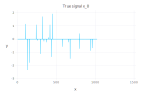

In [8]:
using Gadfly, Random

# random seed
Random.seed!(280)
# Size of signal
n = 1024
# Sparsity (# nonzeros) in the signal
s = 20
# Number of samples (undersample by a factor of 8) 
m = 128

# Generate and display the signal
x0 = zeros(n)
x0[rand(1:n, s)] = randn(s)
# Generate the random sensing matrix
A = randn(m, n) / m
# Subsample by multiplexing
y = A * x0

# plot the true signal
Gadfly.plot(x=1:n, y=x0, Geom.line, Guide.title("True signal x_0"))

### Solve LP by modeling tool Convex.jl

Check [Convex.jl documentation](https://convexjl.readthedocs.io/en/latest/operations.html) for a list of supported operations.

In [9]:
ENV["GRB_LICENSE_FILE"]="/Users/changtaeyeong/gurobi/gurobi.lic"  # set as YOUR path to license file

"/Users/changtaeyeong/gurobi/gurobi.lic"

In [12]:
using Convex

# # Use Mosek solver
# using Mosek, MosekTools
# opt = () -> Mosek.Optimizer(LOG=1)

# Use Gurobi solver
using Gurobi
const GRB_ENV = Gurobi.Env()
opt = () -> Gurobi.Optimizer(GRB_ENV)  

## Use SCS solver
#using SCS
#opt = () -> SCS.Optimizer(verbose=1)  

# # Use COSMO solver
# using COSMO
# opt = () -> COSMO.Optimizer() 


# Set up optimizaiton problem
x = Variable(n)
problem = minimize(norm(x, 1))
problem.constraints += A * x == y

# Solve the problem
@time solve!(problem, opt)



Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 2177 rows, 2049 columns and 136193 nonzeros
Model fingerprint: 0x7662706e
Coefficient statistics:
  Matrix range     [1e-08, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-04, 1e-01]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 1025 rows and 1 columns
Presolve time: 0.11s
Presolved: 1152 rows, 2048 columns, 133120 nonzeros

Ordering time: 0.00s

Barrier statistics:
 Free vars  : 1024
 AA' NZ     : 1.392e+05
 Factor NZ  : 1.590e+05 (roughly 3 MBytes of memory)
 Factor Ops : 2.343e+07 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.51616996e+03  1.93726084e-15  7.11e-15 1.11e-15  2.43e+00     0s
   1   6.35441217e+02  2.73826137

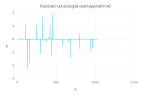

In [11]:
# Display the solution
Gadfly.plot(x=1:n, y=x.value, Geom.line, Guide.title("Reconstructed signal overlayed with x0"))


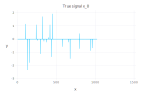

In [14]:
# compare restored one above with the original signal
Gadfly.plot(x=1:n, y=x0, Geom.line, Guide.title("True signal x_0"))

## LP example 2: quantile regression

<img src="./images/quantregbin3.png" width="500"/>

* In linear regression, we model the mean of response variable as a function of covariates. In many situations, the error variance is not constant, the distribution of $y$ may be asymmetric, or we simply care about the quantile(s) of response variable. Quantile regression offers a better modeling tool in these applications.

* It is well known fact that 
$$
\begin{align*}
	E[y|x] &=\text{argmin}_{f(x)} E[\{y-f(x)\}^2] \\
	Med[y|x] &=\text{argmin}_{f(x)} E|y-f(x)|

\end{align*}
$$


* In $\tau$-quantile regression, we minimize the loss function
\begin{align*}
	f(\beta) = \sum_{i=1}^n \rho_\tau (y_i - \mathbf{x}_i^T \beta),
\end{align*}
where $\rho_\tau(z) = z (\tau - 1_{\{z < 0\}})$.  
Note that $0<\tau<1$ and if $\tau=0.5$ then $f(\beta) = \sum_{i=1}^n \frac{1}{2}|y_i - \mathbf{x}_i^T \beta|$

<img src="https://i.stack.imgur.com/DmKq7.png" width="300"/>


Writing the residual vector $\mathbf{r}=\mathbf{y}  - \mathbf{X} \beta = \mathbf{r}^+ - \mathbf{r}^-$, this is equivalent to the LP
\begin{align*}
	\text{minimize}&\quad \tau \mathbf{1}^T \mathbf{r}^+ + (1-\tau) \mathbf{1}^T \mathbf{r}^- \\
	\text{subject to}&\quad \mathbf{r}^+ - \mathbf{r}^- = \mathbf{y} - \mathbf{X} \beta \\
	&\quad \mathbf{r}^+ \succeq \mathbf{0}, \mathbf{r}^- \succeq \mathbf{0}
\end{align*}
in $\mathbf{r}^+$, $\mathbf{r}^-$, and $\beta$.  
Note that constraint function can be expressed as $\begin{bmatrix} I & -I & X \end{bmatrix} \begin{bmatrix}\mathbf{r}^+ \\ \mathbf{r}^- \\ \beta \end{bmatrix} =\mathbf{y}$ and $\begin{bmatrix} \mathbf{I} & \mathbf{0} & \mathbf{0} \\ \mathbf{0} & \mathbf{I} & \mathbf{0}  \end{bmatrix} \begin{bmatrix}\mathbf{r}^+ \\ \mathbf{r}^- \\ \beta \end{bmatrix}\succeq \mathbf{0}$

## LP Example 3: LAD ($\ell_1$ regression)

* A popular method in robust statistics is the least absolute deviation (LAD) regression that minimizes the $\ell_1$ norm of the residual vector $\|\mathbf{y} - \mathbf{X} \beta\|_1$. This apparently is equivalent to the LP
\begin{align*}
	\text{minimize}&\quad \mathbf{1}^T (\mathbf{r}^+ + \mathbf{r}^-) \\
	\text{subject to}&\quad \mathbf{r}^+ - \mathbf{r}^- = \mathbf{y} - \mathbf{X} \beta \\
	&\quad \mathbf{r}^+ \succeq \mathbf{0}, \mathbf{r}^- \succeq \mathbf{0}
\end{align*}
in $\mathbf{r}^+$, $\mathbf{r}^-$, and $\beta$. 

$\ell_1$ regression = LAD = 1/2-quantile regression.

## LP Example 3: $\ell_\infty$ regression (Chebychev approximation)

* Minimizing the worst possible residual $\|\mathbf{y} - \mathbf{X} \beta\|_\infty$ is equivalent to the LP
\begin{align*}
	\text{minimize}&\quad t \\
	\text{subject to}&\quad -t \le y_i - \mathbf{x}_i^T \beta \le t, \quad i = 1,\dots,n
\end{align*}
in variables $\beta$ and $t$.  
This is because the given problem can be written as "$\text{minimize} \max_{i=1,\ldots,m} |\mathbf{x}_i^T \beta - y_i| $"

## LP Example 4: Dantzig selector

* Modification of compress sensing, involving predictor variables.
* [Candes and Tao (2007)](https://www.doi.org/10.1214/009053606000001523) proposed a variable selection method called the Dantzig selector that solves
\begin{align*}
	&\text{minimize}& \|\mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta)\|_\infty \\
	&\text{subject to}& \sum_{j=2}^p |\beta_j| \le t,`
\end{align*}
which can be transformed to an LP. 
* Given predictor matrix $\mathbf{X}$ is standardized, objective function $\|\mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta)\|_\infty$ can be understood as maximum correlation between residual and predictor variables.
	- If well fitted, residual should be uncorrelated with predictor variables.
* summation in the constraint function is taken except $j=1$, which means that we do not penalize the intercept term.
* They named the method after George Dantzig, who invented the simplex method for efficiently solving LP in the 1950s.
* It performs a similar role with LASSO which is a QP problem.



## LP Example 5: 1-norm SVM

* In two-class classification problems, we are given training data $(\mathbf{x}_i, y_i)$, $i=1,\ldots,n$, where $\mathbf{x}_i \in \mathbb{R}^p$ are feature vectors and $y_i \in \{-1, 1\}$ are class labels. [Zhu, Rosset, Tibshirani, and Hastie (2004)](https://papers.nips.cc/paper/2450-1-norm-support-vector-machines.pdf) proposed the 1-norm support vector machine (SVM) that achieves the dual purpose of classification and feature selection. Denote the solution of the optimization problem
\begin{align*}
	&\text{minimize}& \sum_{i=1}^n \left[ 1 - y_i \left( \beta_0 + \sum_{j=1}^p x_{ij} \beta_j \right) \right]_+ \\
	&\text{subject to}& \|\beta\|_1 = \sum_{j=1}^p |\beta_j| \le t
\end{align*}
by $\hat \beta_0(t)$ and $\hat \beta(t)$. 

* Note $[x]_+ = \max(0, x) = \rho_1(x)$. This 1-norm SVM problem is an LP.
* Similar role as a linear regression in the sense that it can be used for binary classification
	- The difference is that loss function for SVM changes to a piecewise linear shape.
* Loss function is designed as the following :
	- If $y_i=1$ then we want $1-x_i^T\beta\approx 0$
	- If $y_i=-1$ then we want $1+x_i^T\beta\approx 0$
* 1-norm SVM classifies a future feature vector $\mathbf{x}$ by the sign of fitted model
\begin{align*}
	\hat f(\mathbf{x}) = \hat \beta_0 + \mathbf{x}^T \hat \beta.
\end{align*}
* Constraint can be transformed in to penalty term on the objective function.

In [15]:
using Random, LinearAlgebra, SparseArrays
using DataFrames

Random.seed!(123) # seed

n, p = 100, 10
# Design matrix
X = [ones(n, 1) randn(n, p)]
# True regression coefficients (first 5 are non-zero)
β = [1.0; randn(5); zeros(p - 5)]
Y = sign.(X * β + 5 * randn(n))

# solve at a grid of λ
# Use Mosek solver
using Mosek, MosekTools
opt = () -> Mosek.Optimizer(LOG=1)
# opt = () -> COSMO.Optimizer(verbose=false) 
λgrid = 0:0.5:10
β̂svmpath = zeros(length(λgrid), size(X, 2)) # each row is β̂ at a λ
β̂svm = Variable(size(X, 2))
@time for i in 1:length(λgrid)
    λ = λgrid[i]
    # objective
    problem = minimize(sum(pos(1 - Y .* (X * β̂svm))) + λ * norm(β̂svm[2:end], 1))
    solve!(problem, opt)
    β̂svmpath[i, :] = β̂svm.value
end

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 221             
  Cones                  : 0               
  Scalar variables       : 122             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization 

  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 221             
  Cones                  : 0               
  Scalar variables       : 122             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)

Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 221             
  Cones                  : 0               
  Scalar variables       : 122             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the dual        
Optimizer  - Constraints            : 11
Optimizer  - Cones                  : 0
Optimizer  - Scalar variables       : 110               conic                  : 0               
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00     

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 66                after factor           : 66              
Factor     - dense dim.             : 0                 flops                  : 1.37e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   6.0e+00  8.4e+01  3.0e+02  0.00e+00   0.000000000e+00   1.000000000e+02   9.0e+00  0.00  
1   1.3e+00  1.8e+01  6.2e+01  6.76e-01   4.601890673e+01   6.666321013e+01   1.9e+00  0.00  
2   1.8e-01  2.5e+00  8.9e+00  1.02e+00   5.914030104e+01   6.206401689e+01   2.7e-01  0.00  
3   1.9e-02  2.7e-01  9.4e-01  1.00e+00   6.174055243e+01   6.204857959e+01   2.8e-02  0.00  
4   3.6e-03  5.0e-02  1.8e-01  9.96e-01 

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   6.9e+00  9.7e+01  3.4e+02  0.00e+00   0.000000000e+00   1.000000000e+02   1.2e+01  0.00  
1   1.4e+00  1.9e+01  6.9e+01  3.36e-01   4.745250175e+01   6.825258092e+01   2.4e+00  0.00  
2   2.4e-01  3.3e+00  1.2e+01  1.01e+00   6.139720064e+01   6.489680484e+01   4.1e-01  0.00  
3   3.3e-02  4.7e-01  1.7e+00  9.97e-01   6.449352063e+01   6.498658820e+01   5.8e-02  0.00  
4   4.9e-03  6.8e-02  2.4e-01  1.00e+00   6.491524753e+01   6.498749272e+01   8.5e-03  0.00  
5   3.3e-04  4.6e-03  1.6e-02  9.97e-01   6.498688648e+01   6.499178838e+01   5.7e-04  0.00  
6   4.1e-05  5.8e-04  2.0e-03  9.99e-01   6.499150164e+01   6.499211249e+01   7.1e-05  0.00  
7   5.7e-06  8.0e-05  2.8e-04  1.00e+00   6.499209604e+01   6.499218052e+01   9.9e-06  0.00  
8   6.9e-08  9.7e-07  3.4e-06  1.00e+00   6.499218292e+01   6.499218395e+01   1.2e-07  0.00  
9   1.4e-11  4.3e-09  6.9e-10  1.00e+00   6.499218395e+01   

4   4.8e-03  6.8e-02  2.4e-01  9.96e-01   6.758490741e+01   6.765289253e+01   9.4e-03  0.00  
5   6.2e-04  8.7e-03  3.1e-02  1.00e+00   6.764547821e+01   6.765423588e+01   1.2e-03  0.00  
6   1.0e-06  1.5e-05  5.1e-05  1.00e+00   6.765544794e+01   6.765546252e+01   2.0e-06  0.00  
7   1.0e-10  1.5e-09  5.2e-09  1.00e+00   6.765546198e+01   6.765546198e+01   2.0e-10  0.00  
Basis identification started.
Primal basis identification phase started.
Primal basis identification phase terminated. Time: 0.00
Dual basis identification phase started.
Dual basis identification phase terminated. Time: 0.00
Basis identification terminated. Time: 0.00
Optimizer terminated. Time: 0.00    

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 221             
  Cones                  : 0               
  Scalar variables       : 122             
  Matrix variables       : 0

Dual basis identification phase started.
Dual basis identification phase terminated. Time: 0.00
Basis identification terminated. Time: 0.00
Optimizer terminated. Time: 0.00    

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 221             
  Cones                  : 0               
  Scalar variables       : 122             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.


Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 221             
  Cones                  : 0               
  Scalar variables       : 122             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the dual        
Optimizer  - Constraints            : 11
Optimizer  - Co

Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : LO (linear optimization problem)
  Constraints            : 221             
  Cones                  : 0               
  Scalar variables       : 122             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the dual        
Optimizer  - Constraints            : 11
Optimizer  - Cones                  : 0
Optimizer  - Scalar variables       : 110               conic                  : 0               
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fact

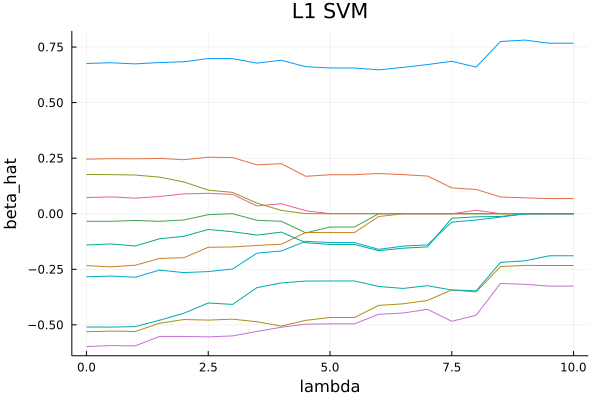

In [17]:
using Plots; gr()

plt = Plots.plot(collect(λgrid), β̂svmpath, legend=:none)  # not Gadfly.plot
xlabel!(plt, "lambda")
ylabel!(plt, "beta_hat")
title!(plt, "L1 SVM")
# Observe that the number of nonzero beta coefficients is five when lambda is 10

## Remark

* Many more applications of LP, especially in the [assignment problem](https://en.wikipedia.org/wiki/Assignment_problem): airport scheduling (Copenhagen airport uses Gurobi), airline flight scheduling, NFL scheduling, match.com, ...

* Apparently any loss/penalty or loss/constraint combinations of form 
$$
\{\ell_1, \ell_\infty, \text{quantile}\} \times \{\ell_1, \ell_\infty, \text{quantile}\},
$$
possibly with affine (equality and/or inequality) constraints, can be formulated as an LP.

## Acknowledgment

Many parts of this lecture note is based on [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Spring Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.